In [188]:
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp

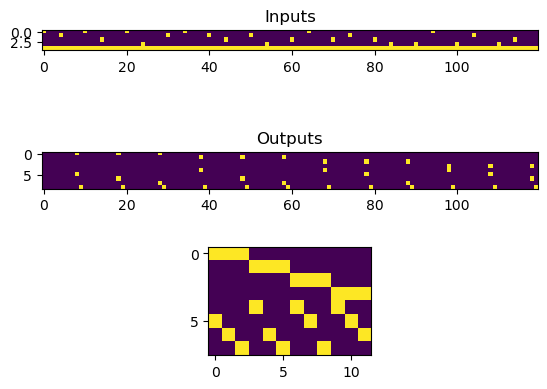

In [189]:
repeat = 0
delay_len = 3
reward = 1

num_trials = 4*(4-(1-repeat))
task_len = 3  + 2*delay_len + reward
D = task_len*num_trials # Total number of conditions

trial_descriptors = np.zeros([8, num_trials])
inputs = np.zeros([4, D])
outputs = np.zeros([9, D])

counter = 0
counter_2 = 0
use = 0
for target_1 in range(4):
    for target_2 in range(4):
        use = 0
        if repeat == 0 and target_2 != target_1:
            use = 1
        elif repeat == 1:
            use = 1

        if use:
            inputs[target_1,counter] = 1
            inputs[target_2,counter + 1 + delay_len] = 1
    
            outputs[target_1,counter+ 2 + 2*delay_len] = 1
            outputs[target_2+4,counter+ 2 + 2*delay_len] = 1
            outputs[-1,counter + 3 + 2*delay_len] = 1
            counter += task_len

            trial_descriptors[target_1,counter_2] = 1
            trial_descriptors[target_2+4,counter_2] = 1
            counter_2 += 1
            
# Now stack a bias on the inputs
inputs = np.vstack([inputs, np.ones([1, inputs.shape[1]])])

plt.subplot(3, 1, 1)
plt.title('Inputs')
plt.imshow(inputs)

plt.subplot(3,1,2)
plt.imshow(outputs)
plt.title('Outputs')

plt.subplot(3,1,3)
plt.imshow(trial_descriptors)

N  = 100

In [190]:

def generate_rep(params, inputs):
    g = jnp.zeros([N+1, D])
    g = g.at[-1:,:].set(np.ones([1,g.shape[1]]))
    g = g.at[:-1,::task_len].set(params["I"]@inputs[:,::task_len])
    for t in range(1,1+delay_len):
        g = g.at[:-1,t::task_len].set(params["W1"]@g[:,t-1::task_len])
    g = g.at[:-1,1+delay_len::task_len].set(params["W2"]@g[:,delay_len::task_len]+ params["I"]@inputs[:,1+delay_len::task_len])
    for t in range(2+delay_len, task_len):
        g = g.at[:-1,t::task_len].set(params["W1"]@g[:,t-1::task_len])
    return g

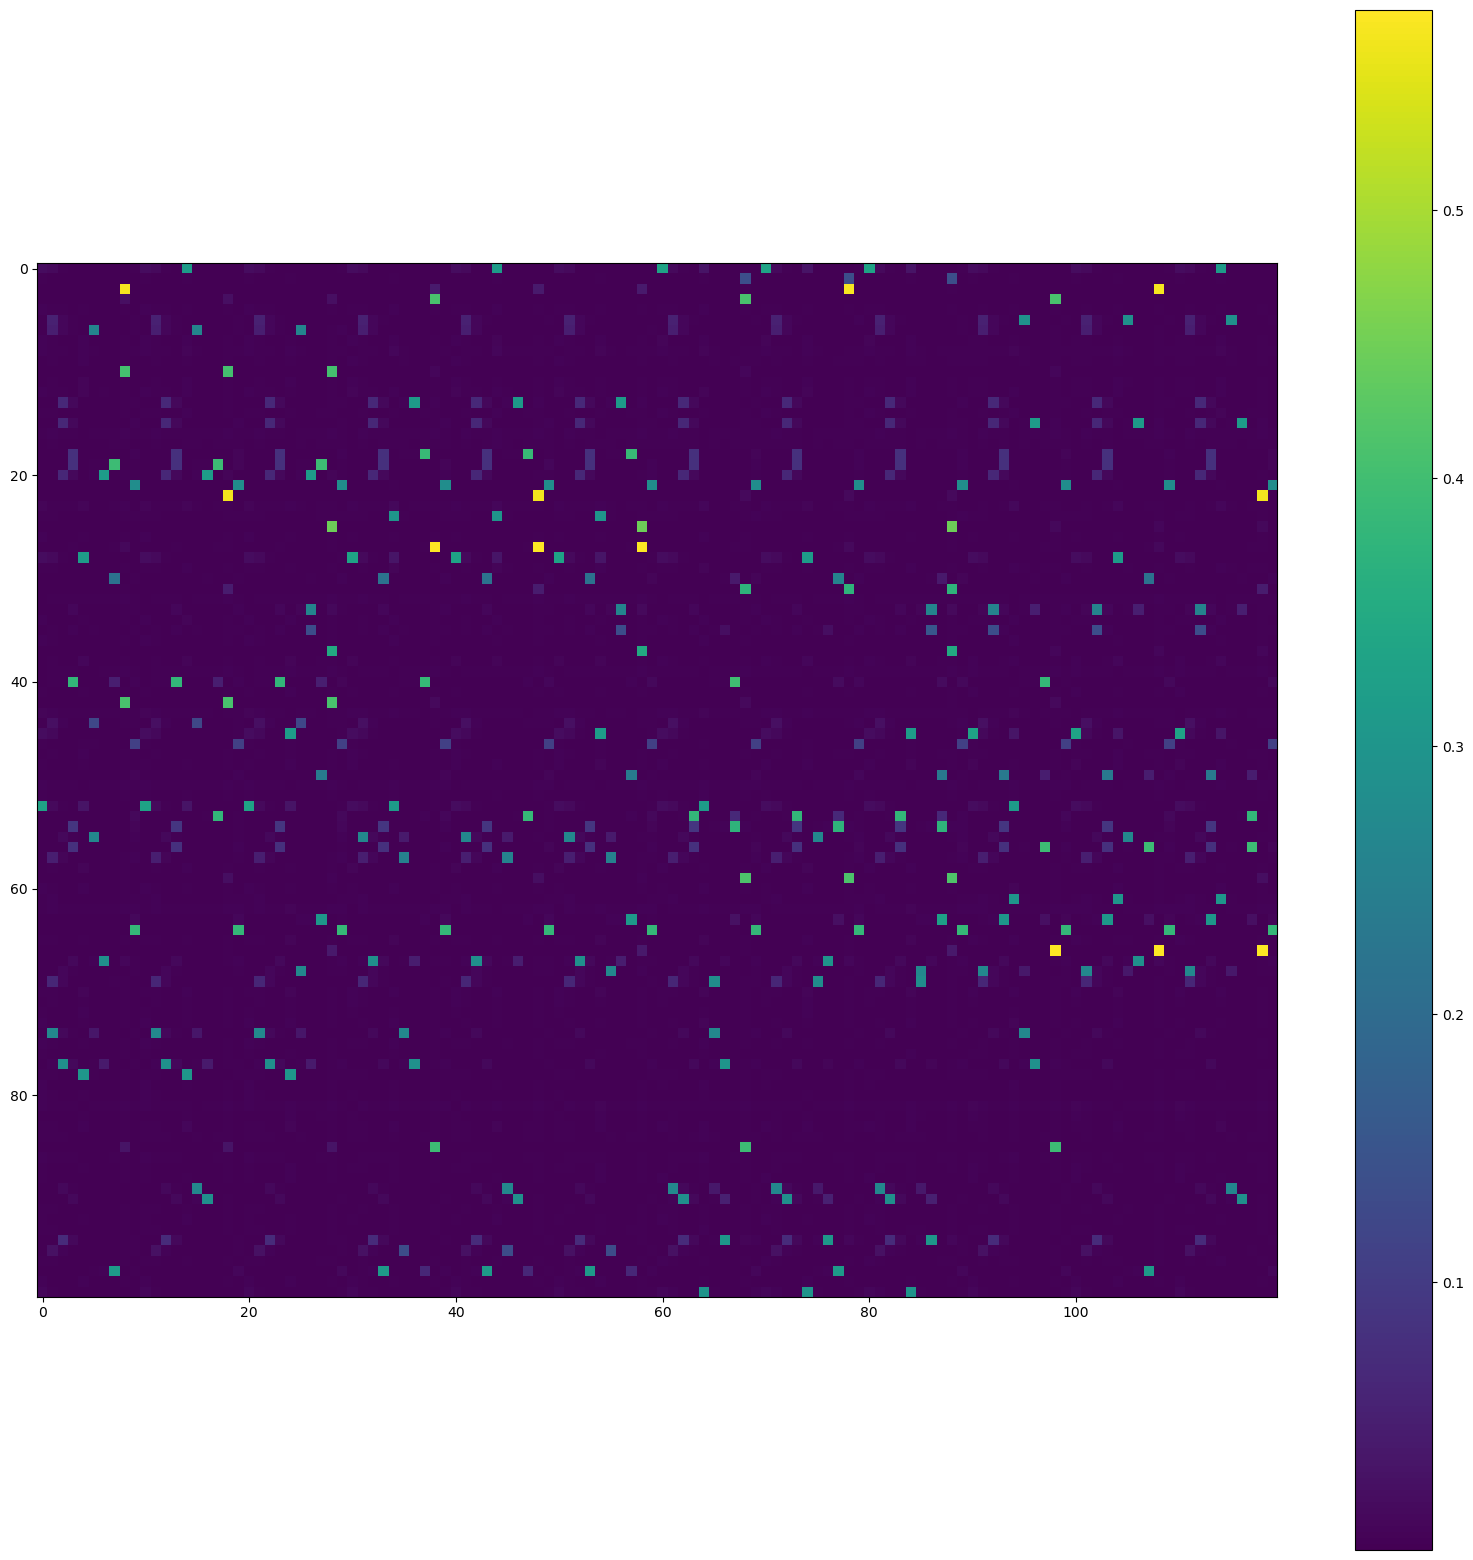

In [191]:
params = np.load('./data/test_warden.npy', allow_pickle = True)[()]
g = generate_rep(params, inputs)
plt.figure(figsize = (20, 20))
plt.imshow(g[:-1,:])
plt.colorbar()

In [192]:
# Create the two plots from Mikkelsen et al.
g_avg = np.zeros([N, 2, 4, task_len])
for rank in range(2):
    for target in range(4):
        trial_ids = np.where(trial_descriptors[rank*4 + target,:] == 1)[0]
        for trial in trial_ids:
            g_avg[:,rank,target,:] += g[:-1,task_len*trial:task_len*(trial+1)]
        g_avg[:,rank,target,:] = g_avg[:,rank,target,:]/len(trial_ids)

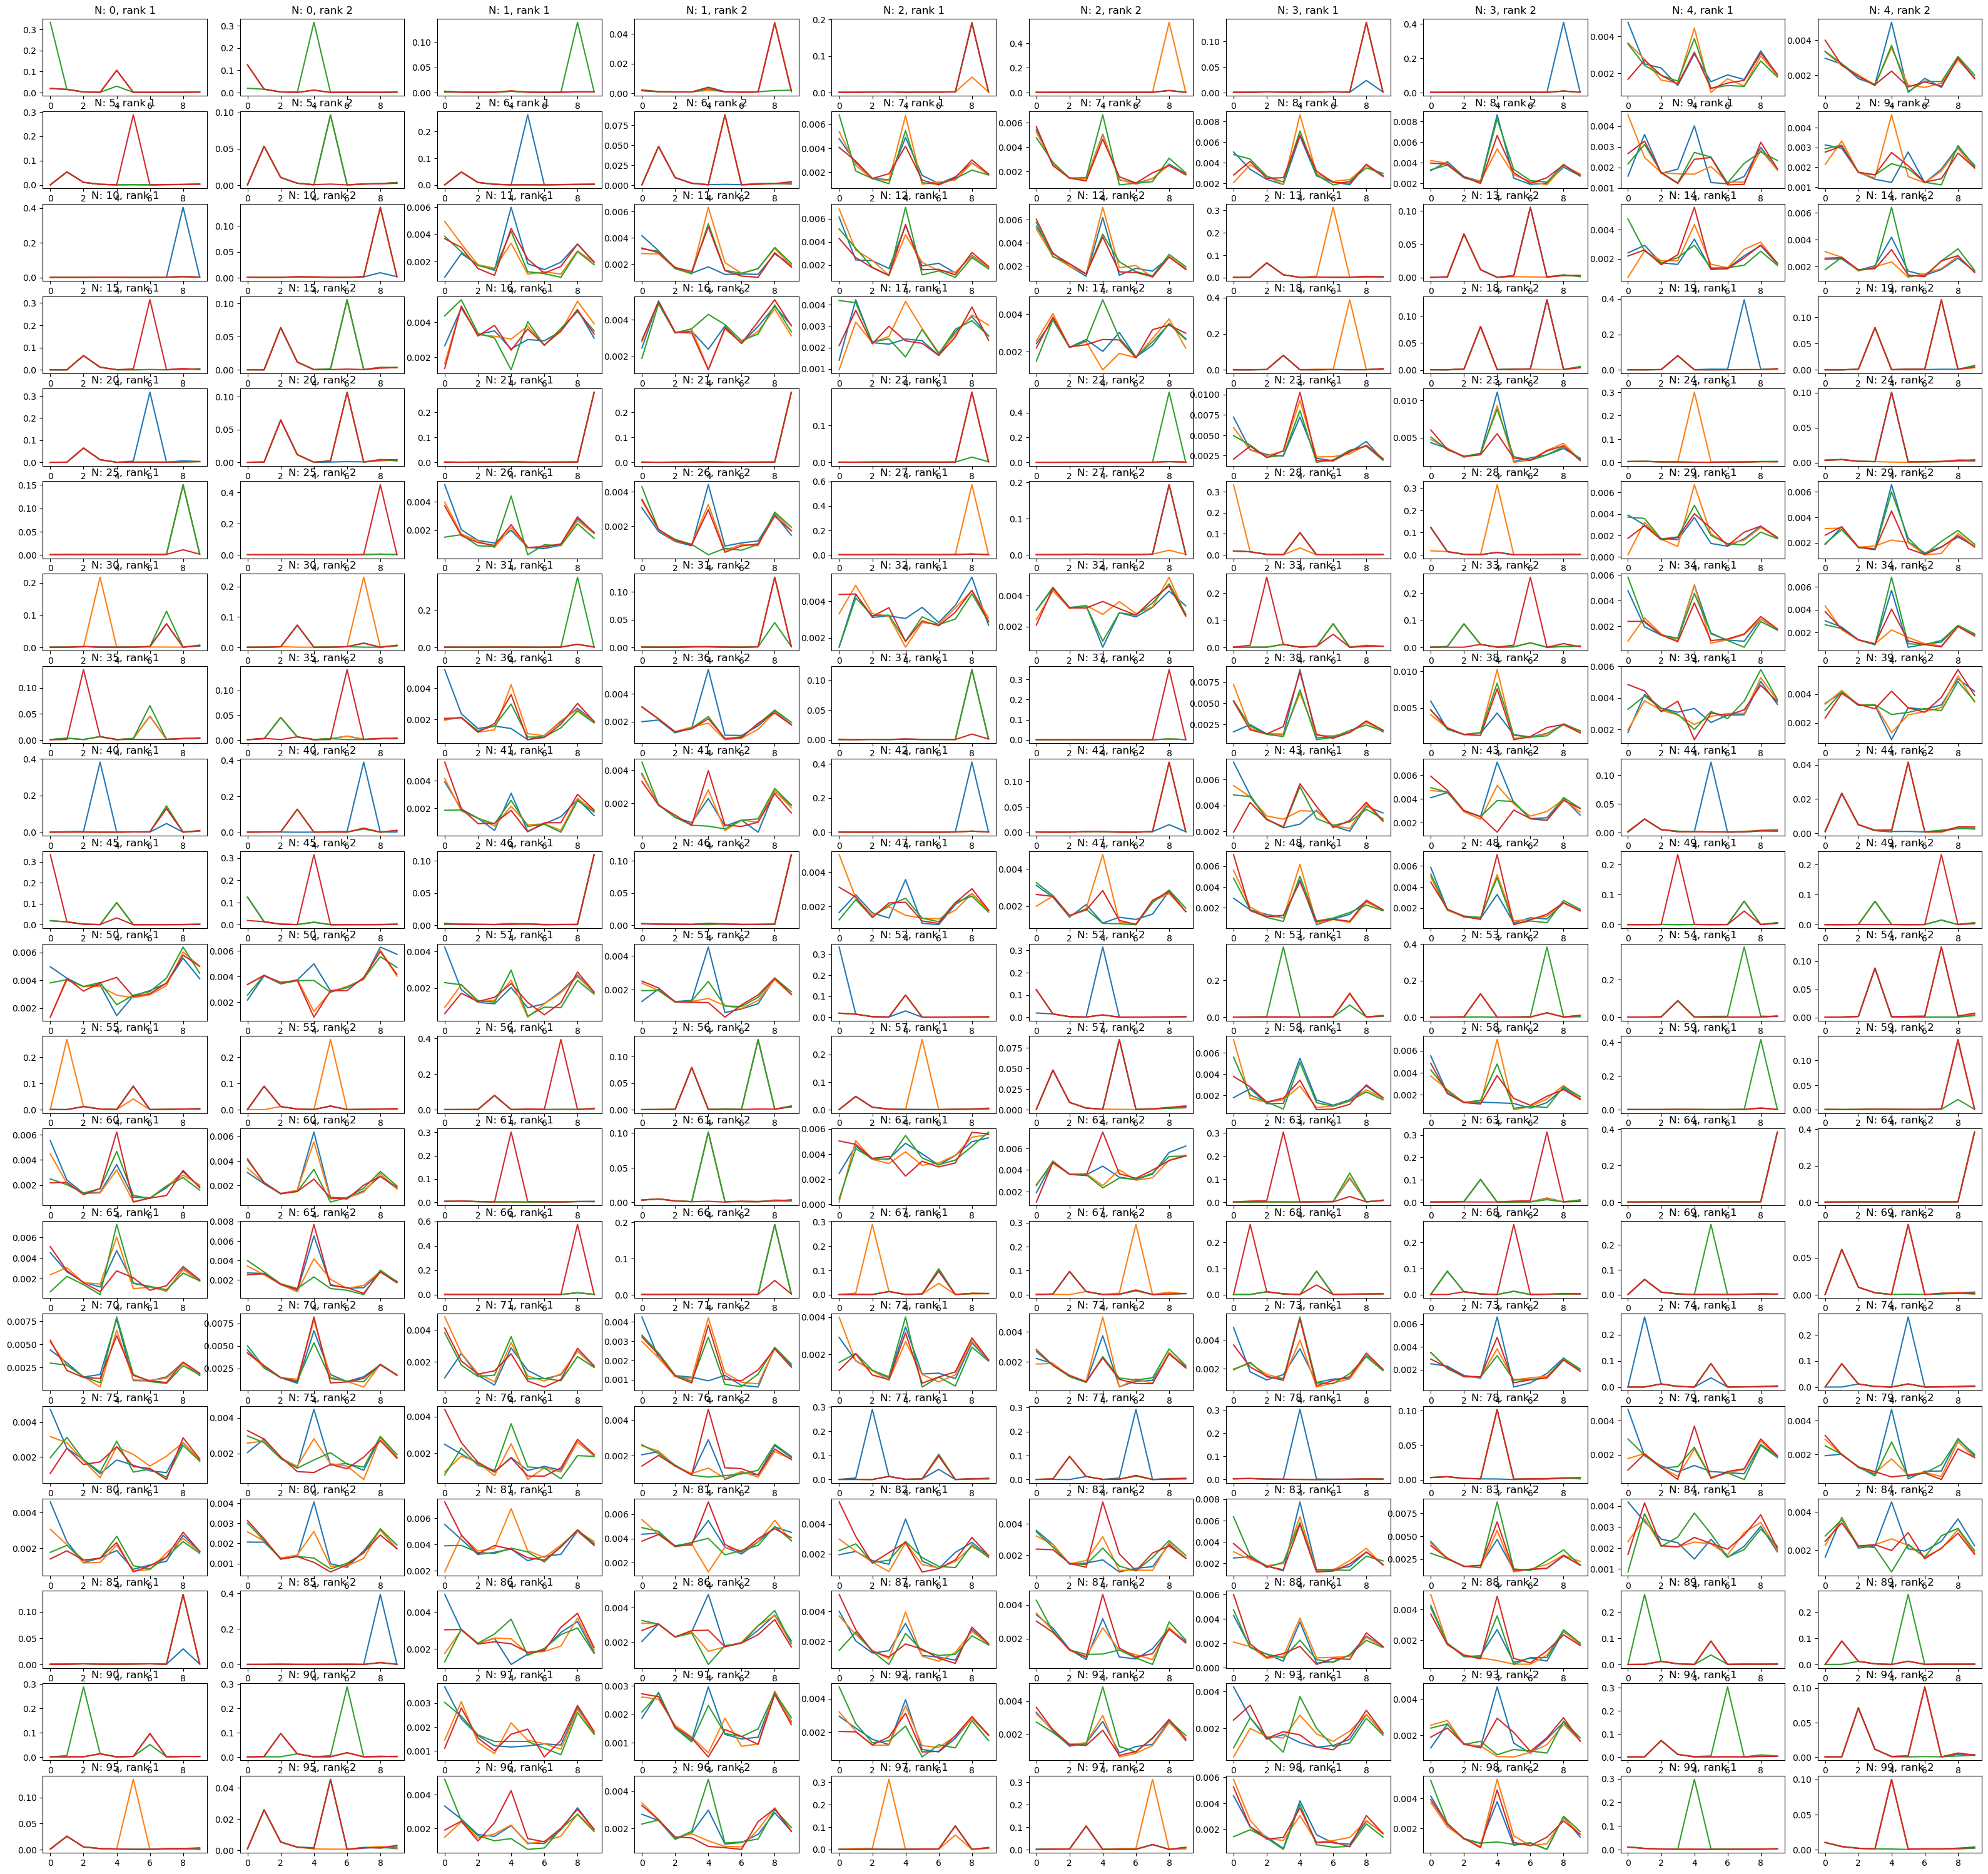

In [193]:
plt.figure(figsize = (40, 40))
cols = 10
rows = int(2*N/cols) + 1
for neuron in range(N):
    plt.subplot(rows, cols, 2*neuron+1)
    plt.plot(g_avg[neuron,0,:,:].T)
    plt.title(f'N: {neuron}, rank 1')
    plt.subplot(rows, cols, 2*neuron+2)
    plt.plot(g_avg[neuron,1,:,:].T)
    plt.title(f'N: {neuron}, rank 2')

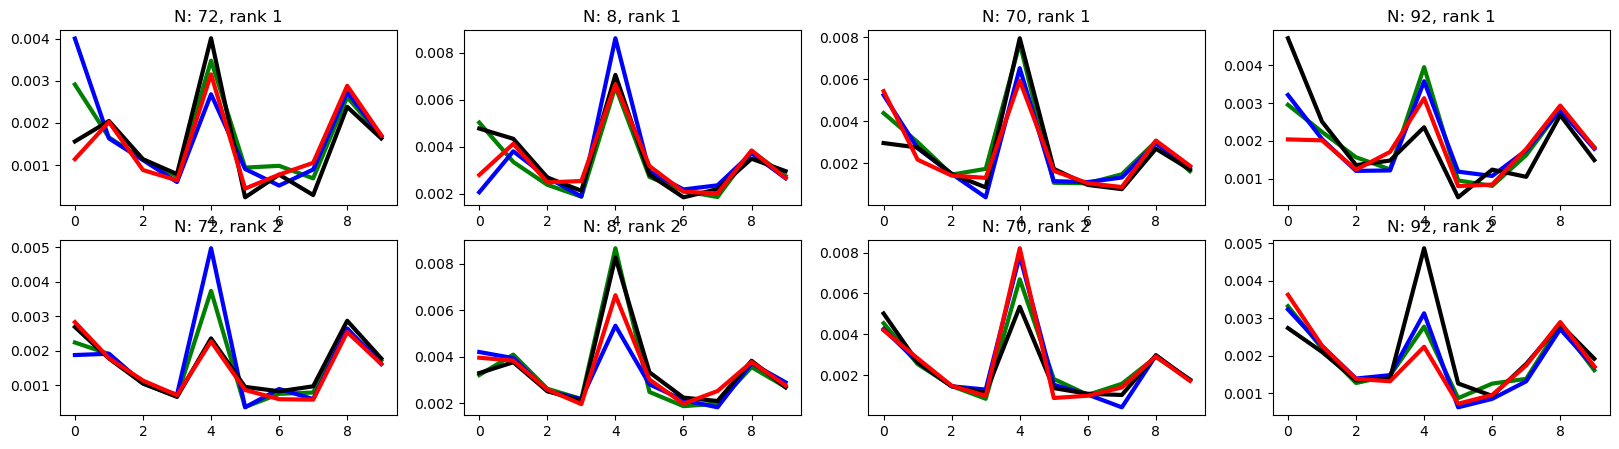

In [202]:
neurons_plot = [72, 8, 70, 92]
cs = ['green', 'blue', 'black', 'red']

plt.figure(figsize = (20, 5))
for neuron_ind, neuron in enumerate(neurons_plot):
    plt.subplot(2, len(neurons_plot), 1+neuron_ind)
    for q in range(4):
        plt.plot(g_avg[neuron,0,q,:].T, lw=3, color = cs[q])
    plt.title(f'N: {neuron}, rank 1')

    
    
    plt.subplot(2, len(neurons_plot), 1+len(neurons_plot)+neuron_ind)
    for q in range(4):
        plt.plot(g_avg[neuron,1,q,:].T, lw=3, color = cs[q])
    plt.title(f'N: {neuron}, rank 2')
    

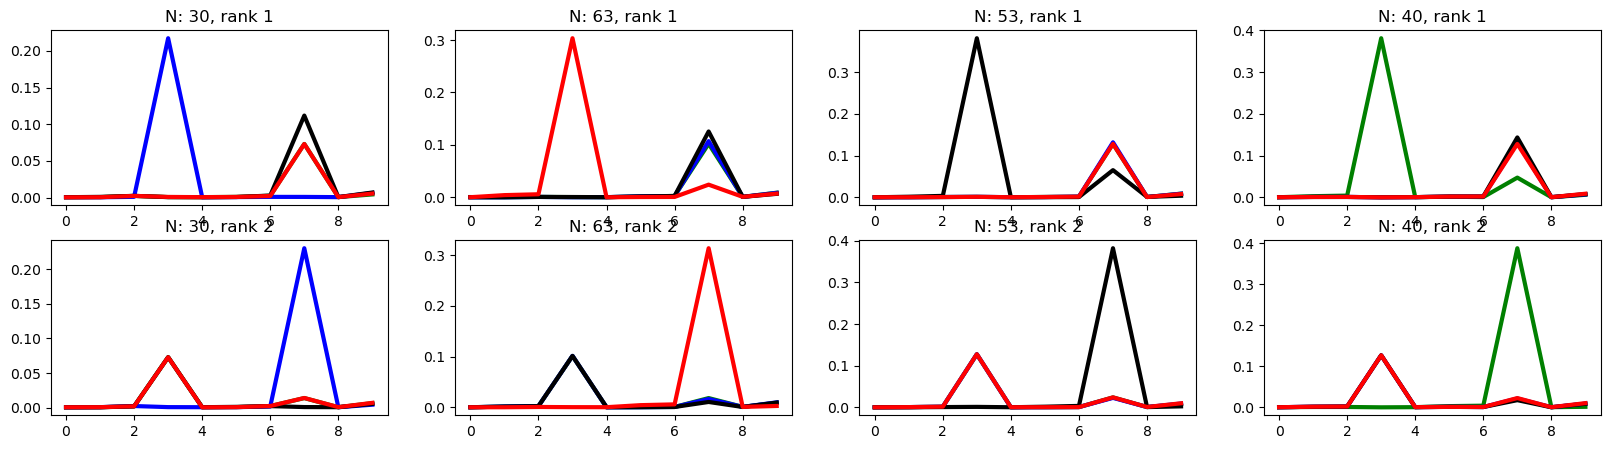

In [203]:
neurons_plot = [30, 63, 53, 40]
cs = ['green', 'blue', 'black', 'red']

plt.figure(figsize = (20, 5))
for neuron_ind, neuron in enumerate(neurons_plot):
    plt.subplot(2, len(neurons_plot), 1+neuron_ind)
    for q in range(4):
        plt.plot(g_avg[neuron,0,q,:].T, lw=3, color = cs[q])
    plt.title(f'N: {neuron}, rank 1')

    
    
    plt.subplot(2, len(neurons_plot), 1+len(neurons_plot)+neuron_ind)
    for q in range(4):
        plt.plot(g_avg[neuron,1,q,:].T, lw=3, color = cs[q])
    plt.title(f'N: {neuron}, rank 2')

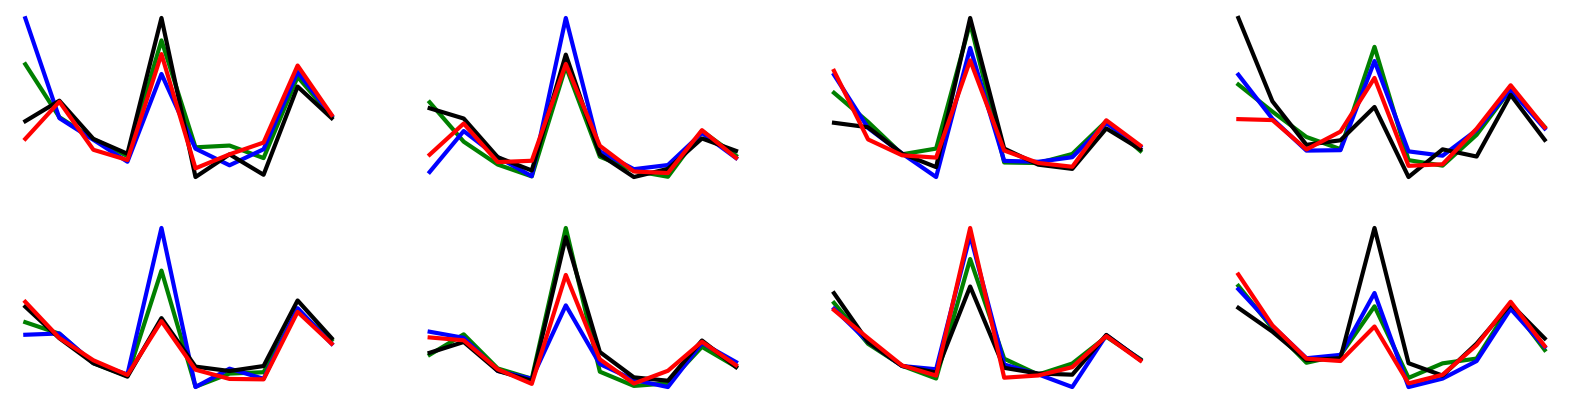

In [208]:
neurons_plot = [72, 8, 70, 92]
cs = ['green', 'blue', 'black', 'red']

plt.figure(figsize = (20, 5))
for neuron_ind, neuron in enumerate(neurons_plot):
    plt.subplot(2, len(neurons_plot), 1+neuron_ind)
    
    for q in range(4):
        plt.plot(g_avg[neuron,0,q,:].T, lw=3, color = cs[q])
    ax = plt.gca()
    ax.axis('off')
    #plt.title(f'N: {neuron}, rank 1')


    plt.subplot(2, len(neurons_plot), 1+len(neurons_plot)+neuron_ind)
    for q in range(4):
        plt.plot(g_avg[neuron,1,q,:].T, lw=3, color = cs[q])
    ax = plt.gca()
    ax.axis('off')
    #plt.title(f'N: {neuron}, rank 2')

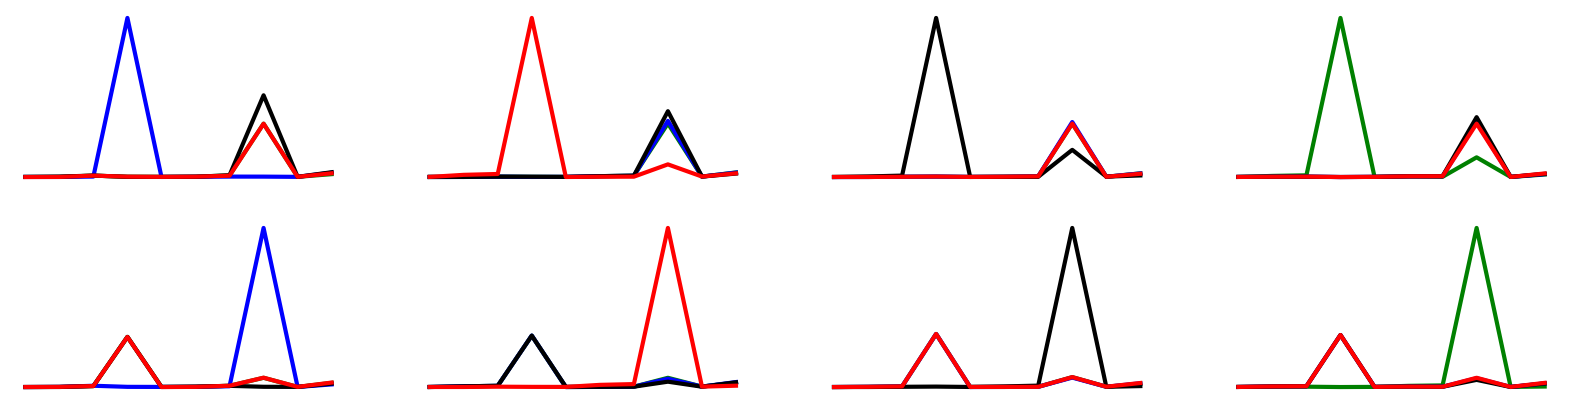

In [206]:
neurons_plot = [30, 63, 53, 40]
cs = ['green', 'blue', 'black', 'red']

plt.figure(figsize = (20, 5))
for neuron_ind, neuron in enumerate(neurons_plot):
    plt.subplot(2, len(neurons_plot), 1+neuron_ind)
    for q in range(4):
        plt.plot(g_avg[neuron,0,q,:].T, lw=3, color = cs[q])
    ax = plt.gca()
    ax.axis('off')
    #plt.title(f'N: {neuron}, rank 1')
    
    
    plt.subplot(2, len(neurons_plot), 1+len(neurons_plot)+neuron_ind)
    for q in range(4):
        plt.plot(g_avg[neuron,1,q,:].T, lw=3, color = cs[q])
    ax = plt.gca()
    ax.axis('off')
    #plt.title(f'N: {neuron}, rank 2')